In [2]:
import pandas as pd
import numpy as np
#import locale
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.pipeline import Pipeline
import seaborn as sns
from scipy.stats import iqr
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("Sample_Data2.csv")
df.shape

(995, 70)

In [4]:
N=df[['category','Country','medium','AOV','CPI','CPM','CPO','CPU','CR','NR/1000 Views','Total Costs','User / View','Total NR']]

In [5]:
import  re
N['Total Costs'] = (N['Total Costs'].replace('[.\,€]', '', regex=True).astype(float))/100
N['Total NR'] = (N['Total NR'].replace('[.\,€]', '', regex=True).astype(float))/100
N['AOV'] = (N['AOV'].replace('[.\,€]', '', regex=True).astype(float))/100
N['CPI'] = (N['CPI'].replace('[.\,€]', '', regex=True).astype(float))/100
N['CPM'] = (N['CPM'].replace('[.\,€]', '', regex=True).astype(float))/100
N['CPO'] = (N['CPO'].replace('[.\,€]', '', regex=True).astype(float))/100
N['CPU'] = (N['CPU'].replace('[.\,€]', '', regex=True).astype(float))/100
N['CR'] = (N['CR'].replace('[.\,%]', '', regex=True).astype(float))/100
N['User / View'] = (N['User / View'].replace('[.\,€]', '', regex=True).astype(float))/100

In [6]:
N.to_csv("N.csv")

In [7]:
N.loc[N['category']=='travel ',"category"]='Travel'
N.loc[N['category']=='travel',"category"]='Travel'
N.loc[N['category']=='sport',"category"]='sports'
N.loc[N['category']=='beauty',"category"]='Beauty'
N.loc[N['category']=='fashion',"category"]='Fashion'

N.loc[N['category']=='gaming',"category"]='Others'
N.loc[N['category']=='Travel',"category"]='Others'
N.loc[N['category']=='music',"category"]='Others'
N.loc[N['category']=='yoga',"category"]='Others'
N.loc[N['category']=='TV',"category"]='Others'
N.loc[N['category']=='sustainability',"category"]='Others'
N.loc[N['category']=='Beauty',"category"]='Others'
N.loc[N['category']=='Sport',"category"]='Others'
N.loc[N['category']=='Entertainment',"category"]='Others'
N.loc[N['category']=='tech',"category"]='Others'
N.loc[N['category']=='diy',"category"]='Others'
N.loc[N['category']=='nutrition',"category"]='Others'
N.loc[N['category']=='style',"category"]='Others'
N.loc[N['category']=='food',"category"]='Others'
N.loc[N['category']=='business',"category"]='Others'
N.loc[N['category']=='photography',"category"]='Others'
N.loc[N['category']=='fitness',"category"]='Others'
N.loc[N['category']=='senior',"category"]='Others'

In [8]:
N=N.rename(columns={'User / View': 'User Per View','NR/1000 Views': 'NR per 1000'})
N.head()

,category,Country,medium,AOV,CPI,CPM,CPO,CPU,CR,NR per 1000,Total Costs,User Per View,Total NR
0,lifestyle,Germany,youtube,38.00,0.44,43.41,215.35,11.33,2.68,8.0,646.04,0.00,113.99
1,Others,Germany,instagram,40.37,2.62,66.35,102.16,3.40,3.19,26.0,10420.00,0.02,4117.87
2,family,Germany,instagram,56.57,0.52,17.69,5.94,0.66,10.55,168.0,320.94,0.03,3054.59
3,sports,Germany,instagram,29.87,0.55,24.07,69.47,1.34,1.84,10.0,208.40,0.02,89.62
4,family,Germany,instagram,33.92,1.05,21.05,390.75,7.37,1.83,2.0,3126.00,0.00,271.33


In [9]:
print(N.groupby('category')['Country'].count().reset_index().sort_values('Country', ascending=False))
print(N.shape)

        category  Country
3         family      377
5      lifestyle      233
6         sports      208
2  entertainment       60
1         Others       57
0        Fashion       42
4         health       18
(995, 13)


In [10]:
print(N.groupby('category')['Country'].count().reset_index().sort_values('Country', ascending=False))
print(N.shape)

        category  Country
3         family      377
5      lifestyle      233
6         sports      208
2  entertainment       60
1         Others       57
0        Fashion       42
4         health       18
(995, 13)


In [11]:
N.loc[N['medium']=='instagram',"medium"]='Instagram'
N.loc[N['medium']=='instagram ',"medium"]='Instagram'
N.loc[N['medium']=='blog',"medium"]='Blog'
N.loc[N['medium']=='Blog',"medium"]='Others_M'
N.loc[N['medium']=='pinterest',"medium"]='Others_M'
N.loc[N['medium']=='podcast',"medium"]='Others_M'
N.loc[N['medium']=='snapchat',"medium"]='Others_M'
N.shape

(995, 13)

In [12]:
N.groupby('medium')['Country'].count().reset_index().sort_values('Country', ascending=False)

,medium,Country
0,Instagram,968
3,youtube,12
2,twitch,10
1,tiktok,5


In [13]:
N=N.dropna(axis=0,how='all',subset=['AOV','CPI','CPM','CPO','CPU','CR','NR per 1000','User Per View','Total Costs'])
N.head()

,category,Country,medium,AOV,CPI,CPM,CPO,CPU,CR,NR per 1000,Total Costs,User Per View,Total NR
0,lifestyle,Germany,youtube,38.00,0.44,43.41,215.35,11.33,2.68,8.0,646.04,0.00,113.99
1,Others,Germany,Instagram,40.37,2.62,66.35,102.16,3.40,3.19,26.0,10420.00,0.02,4117.87
2,family,Germany,Instagram,56.57,0.52,17.69,5.94,0.66,10.55,168.0,320.94,0.03,3054.59
3,sports,Germany,Instagram,29.87,0.55,24.07,69.47,1.34,1.84,10.0,208.40,0.02,89.62
4,family,Germany,Instagram,33.92,1.05,21.05,390.75,7.37,1.83,2.0,3126.00,0.00,271.33


In [14]:
mean_CPM=N['CPM'].mean()
mean_AOV=N['AOV'].mean()
mean_CPU=N['CPU'].mean()
mean_CPI=N['CPI'].mean()
mean_CPO=N['CPO'].mean()
mean_CR=N['CR'].mean()
mean_TotalCosts=N['Total Costs'].mean()
mean_NR=N['NR per 1000'].mean()
mean_User_View=N['User Per View'].mean()

median_CPM=N['CPM'].median()
median_AOV=N['AOV'].median()
median_CPU=N['CPU'].median()
median_CPI=N['CPI'].median()
median_CPO=N['CPO'].median()
median_CR=N['CR'].median()
median_TotalCosts=N['Total Costs'].median()
median_NR=N['NR per 1000'].median()
median_User_View=N['User Per View'].median()

In [15]:
N['CPM']=N['CPM'].fillna(0)
N['AOV']=N['AOV'].fillna(0)
N['CPU']=N['CPU'].fillna(0)
N['CPI']=N['CPI'].fillna(0)
N['CPO']=N['CPO'].fillna(0)
N['CR']=N['CR'].fillna(0)
N['Total Costs']=N['Total Costs'].fillna(0)
N['NR per 1000']=N['NR per 1000'].fillna(0)
N['User Per View']=N['User Per View'].fillna(0)


#N['CPM']=N['CPM'].fillna(0)
#N['AOV']=N['AOV'].fillna(0)
#N['CPU']=N['CPU'].fillna(0)
#N['CPI']=N['CPI'].fillna(0)
#N['CPO']=N['CPO'].fillna(0)
#N['CR']=N['CR'].fillna(0)
#N['Total Costs']=N['Total Costs'].fillna(0)
#N['NR per 1000']=N['NR per 1000'].fillna(0)
#N['User Per View']=N['User Per View'].fillna(0)

In [16]:
N.head()

,category,Country,medium,AOV,CPI,CPM,CPO,CPU,CR,NR per 1000,Total Costs,User Per View,Total NR
0,lifestyle,Germany,youtube,38.00,0.44,43.41,215.35,11.33,2.68,8.0,646.04,0.00,113.99
1,Others,Germany,Instagram,40.37,2.62,66.35,102.16,3.40,3.19,26.0,10420.00,0.02,4117.87
2,family,Germany,Instagram,56.57,0.52,17.69,5.94,0.66,10.55,168.0,320.94,0.03,3054.59
3,sports,Germany,Instagram,29.87,0.55,24.07,69.47,1.34,1.84,10.0,208.40,0.02,89.62
4,family,Germany,Instagram,33.92,1.05,21.05,390.75,7.37,1.83,2.0,3126.00,0.00,271.33


In [17]:
#N['AOV']=(N['AOV']-N['AOV'].mean())/N['AOV'].std()
#N['CPI']=(N['CPI']-N['CPI'].mean())/N['CPI'].std()
#N['CPO']=(N['CPO']-N['CPO'].mean())/N['CPO'].std()
#N['CPU']=(N['CPU']-N['CPU'].mean())/N['CPU'].std()
#N['Total Costs']=(N['Total Costs']-N['Total Costs'].mean())/N['Total Costs'].std()
N['AOV']=(N['AOV']-N['AOV'].min())/(N['AOV'].max()-N['AOV'].min())
N['CPM']=(N['CPM']-N['CPM'].min())/(N['CPM'].max()-N['CPM'].min())
N['CPI']=(N['CPI']-N['CPI'].min())/(N['CPI'].max()-N['CPI'].min())
N['CPO']=(N['CPO']-N['CPO'].min())/(N['CPO'].max()-N['CPO'].min())
N['CPU']=(N['CPU']-N['CPU'].min())/(N['CPU'].max()-N['CPU'].min())
N['Total Costs']=(N['Total Costs']-N['Total Costs'].min())/(N['Total Costs'].max()-N['Total Costs'].min())
N['CR']=(N['CR']-N['CR'].min())/(N['CR'].max()-N['CR'].min())
N['NR per 1000']=(N['NR per 1000']-N['NR per 1000'].min())/(N['NR per 1000'].max()-N['NR per 1000'].min())
N['User Per View']=(N['User Per View']-N['User Per View'].min())/(N['User Per View'].max()-N['User Per View'].min())


In [18]:
N.head()

,category,Country,medium,AOV,CPI,CPM,CPO,CPU,CR,NR per 1000,Total Costs,User Per View,Total NR
0,lifestyle,Germany,youtube,0.007037,0.012937,0.129493,0.107675,0.261482,0.178840,0.008753,0.057407,0.000000,113.99
1,Others,Germany,Instagram,0.007668,0.077036,0.197924,0.051080,0.078468,0.213652,0.028446,0.925926,0.105263,4117.87
2,family,Germany,Instagram,0.011981,0.015290,0.052770,0.002970,0.015232,0.716041,0.183807,0.028519,0.157895,3054.59
3,sports,Germany,Instagram,0.004872,0.016172,0.071801,0.034735,0.030925,0.121502,0.010941,0.018519,0.105263,89.62
4,family,Germany,Instagram,0.005951,0.030873,0.062793,0.195375,0.170090,0.120819,0.002188,0.277778,0.000000,271.33


In [19]:
dmy_country=pd.get_dummies(N['Country'])
dmy_medium=pd.get_dummies(N['medium'])
dmy_category=pd.get_dummies(N['category'])

In [20]:
dmy_country=dmy_country.drop(['Switzerland'],axis='columns')


In [21]:
#dmy_country

In [22]:
Merged=pd.concat([N,dmy_country,dmy_medium,dmy_category],axis='columns')

In [23]:
Merged=Merged.drop(columns=['category', 'Country','medium'])

In [24]:
#Merged.dtypes

In [25]:
CPO_LOL=np.quantile(Merged['CPO'],.25, interpolation='midpoint')-iqr(Merged['CPO'])
CPO_HOL=np.quantile(Merged['CPO'],.75, interpolation='midpoint')+iqr(Merged['CPO'])
Merged = Merged[(Merged['CPO'] < CPO_HOL) & (Merged['CPO'] > CPO_LOL) ]

AOV_LOL=np.quantile(Merged['AOV'],.25, interpolation='midpoint')-iqr(Merged['AOV'])
AOV_HOL=np.quantile(Merged['AOV'],.75, interpolation='midpoint')+iqr(Merged['AOV'])
Merged = Merged[(Merged['AOV'] < AOV_HOL) & (Merged['AOV'] > AOV_LOL) ]

CPI_LOL=np.quantile(Merged['CPI'],.25, interpolation='midpoint')-iqr(Merged['CPI'])
CPI_HOL=np.quantile(Merged['CPI'],.75, interpolation='midpoint')+iqr(Merged['CPI'])
Merged = Merged[(Merged['CPI'] < CPI_HOL) & (Merged['CPI'] > CPI_LOL) ]


CPM_LOL=np.quantile(Merged['CPM'],.25, interpolation='midpoint')-iqr(Merged['CPM'])
CPM_HOL=np.quantile(Merged['CPM'],.75, interpolation='midpoint')+iqr(Merged['CPM'])
Merged = Merged[(Merged['CPM'] < CPM_HOL) & (Merged['CPM'] > CPM_LOL) ]

CPU_LOL=np.quantile(Merged['CPU'],.25, interpolation='midpoint')-iqr(Merged['CPU'])
CPU_HOL=np.quantile(Merged['CPU'],.75, interpolation='midpoint')+iqr(Merged['CPU'])
Merged = Merged[(Merged['CPU'] < CPU_HOL) & (Merged['CPU'] > CPU_LOL) ]

CR_LOL=np.quantile(Merged['CR'],.25, interpolation='midpoint')-iqr(Merged['CR'])
CR_HOL=np.quantile(Merged['CR'],.75, interpolation='midpoint')+iqr(Merged['CR'])
Merged = Merged[(Merged['CR'] < CR_HOL) & (Merged['CR'] > CR_LOL) ]

NRP100_LOL=np.quantile(Merged['NR per 1000'],.25, interpolation='midpoint')-iqr(Merged['NR per 1000'])
NRP100_HOL=np.quantile(Merged['NR per 1000'],.75, interpolation='midpoint')+iqr(Merged['NR per 1000'])
Merged = Merged[(Merged['NR per 1000'] < NRP100_HOL) & (Merged['NR per 1000'] > NRP100_LOL) ]

In [38]:
Merged.shape
print(NRP100_LOL)

-0.026258205689277902


In [39]:
reg=linear_model.LinearRegression()


In [40]:
#X=Merged[['AOV', 'CPI', 'CPM','CPO','CPU','CR','NR per 1000','Total Costs','User Per View','Austria','Germany','France','Instagram','Others_M','tiktok','twitch','youtube','Fashion','Others','entertainment','family','health','lifestyle','sports']]
X=Merged[['AOV', 'CPI','CPO', 'CPM','CPU','CR','NR per 1000','Total Costs','Instagram','tiktok','twitch','youtube']]

In [66]:
y=Merged['Total NR']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1)

In [67]:
X_train.head()

,AOV,CPI,CPO,CPM,CPU,CR,NR per 1000,Total Costs,Instagram,tiktok,twitch,youtube
501,0.004489,0.016172,0.010000,0.055425,0.017771,0.240273,0.028446,0.026658,1,0,0,0
794,0.004707,0.041164,0.014815,0.093011,0.040157,0.374061,0.033917,0.284353,1,0,0,0
730,0.007284,0.005293,0.019920,0.047400,0.006231,0.040956,0.017505,0.060185,1,0,0,0
863,0.002252,0.038812,0.078125,0.060913,0.048004,0.079863,0.003282,0.055538,1,0,0,0
693,0.003544,0.006763,0.003295,0.059064,0.014540,0.589761,0.082057,0.012885,1,0,0,0


In [68]:
reg.fit(X_train,y_train)
#reg.fit(Merged[['Total Costs']],Merged['Total NR'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [69]:
yhat=reg.predict(X_test)

In [70]:
import seaborn as sns

<AxesSubplot:xlabel='Total NR'>

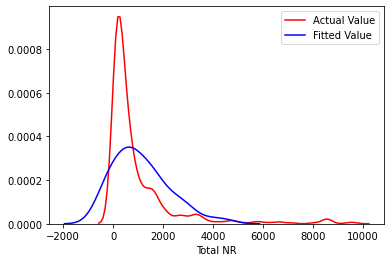

In [71]:
ax1=sns.distplot(Merged['Total NR'],hist=False,color='r',label="Actual Value")
sns.distplot(yhat, hist=False,color='b',label="Fitted Value",ax=ax1)

In [89]:
reg.score

0.6620654466832891

In [85]:
r2_score(y_test,ypipe )

0.9293839427201465

In [86]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]
pipe=Pipeline(Input)

In [87]:
pipe.fit(X_train,y_train)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('polynomial', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)), ('model', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

In [88]:
ypipe=pipe.predict(X_test)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


In [79]:
r_squared = r2_score(y_test,ypipe )
r_squared

0.9293839427201465

In [80]:
 from sklearn.metrics import mean_squared_error

In [81]:
np.sqrt(mean_squared_error(y_test,ypipe))

385.6306767309595

<AxesSubplot:xlabel='Total NR'>

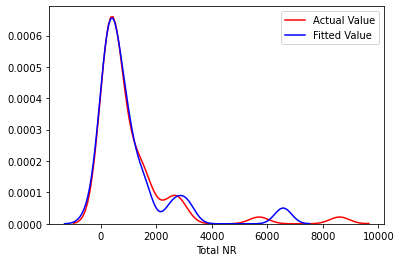

In [82]:
ax1=sns.distplot(y_test,hist=False,color='r',label="Actual Value")
sns.distplot(ypipe, hist=False,color='b',label="Fitted Value",ax=ax1)